In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# There was something Jocelyn did to modify the image sizes without modifying the dtype
size = 7
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Resize(size),
                    transforms.Normalize(0, 1)
                ]), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Resize(size),
                    transforms.Normalize(0, 1)
                ]) 
)

/Users/cristianespinosa/opt/anaconda3/envs/tensor/lib/python3.6/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1631631159818/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


<h3>MNIST Dataset is organized by:</h3>
<div>Set of images (with channels) and labels --> train_data</div>
<div>image (with channels) AND label --> train_data[i (0,59999)]</div>
<div>image (with channels) --> train_data[i][i (0,1)]</div>
<div>image by itself (2D image) --> train_data[i][i][i (0)]</div>

In [3]:
# Images and labels are stored as a tuple (image, label)

print(len(train_data[0]), '\n\n')
print(train_data[0])

2 


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0206, 0.0353,
          0.2569, 0.1971, 0.4127, 0.3667, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0480, 0.5461, 0.7392, 0.9108, 0.9922,
          0.9902, 0.5608, 0.6206, 0.2922, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0176, 0.6941, 0.8490, 0.9451, 0.3833,
          0.6716, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0137, 0.2882, 0.7706, 0.0020,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0108, 0.7049, 0.4461,
          0.1069, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.079

In [4]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0206, 0.0353,
           0.2569, 0.1971, 0.4127, 0.3667, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0480, 0.5461, 0.7392, 0.9108, 0.9922,
           0.9902, 0.5608, 0.6206, 0.2922, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0176, 0.6941, 0.8490, 0.9451, 0.3833,
           0.6716, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0137, 0.2882, 0.7706, 0.0020,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0108, 0.7049, 0.4461,
           0.1069, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.00

In [5]:
train_data[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0206, 0.0353,
          0.2569, 0.1971, 0.4127, 0.3667, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0480, 0.5461, 0.7392, 0.9108, 0.9922,
          0.9902, 0.5608, 0.6206, 0.2922, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0176, 0.6941, 0.8490, 0.9451, 0.3833,
          0.6716, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0137, 0.2882, 0.7706, 0.0020,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0108, 0.7049, 0.4461,
          0.1069, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0794, 0.7

In [6]:
# Prints the entire dataset
train_data[0][0].shape

torch.Size([1, 14, 14])

In [7]:
# Prints one image
train_data[0][0][0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0206, 0.0353, 0.2569,
         0.1971, 0.4127, 0.3667, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0480, 0.5461, 0.7392, 0.9108, 0.9922, 0.9902,
         0.5608, 0.6206, 0.2922, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0176, 0.6941, 0.8490, 0.9451, 0.3833, 0.6716,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0137, 0.2882, 0.7706, 0.0020, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0108, 0.7049, 0.4461, 0.1069,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0794, 0.7098, 0.8608,
  

In [8]:
# Prints one array of pixels (not the entire image)
train_data[0][0][0][0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

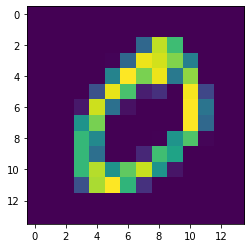

In [9]:
plt.imshow(train_data[1][0][0])

In [10]:
transforms.Resize(size=14)(train_data.data)

tensor([[[  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,  94,   0,   0],
         ...,
         [  0,   0,  57,  ...,   0,   0,   0],
         [  0,   0,  97,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        [[  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         ...,
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        [[  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,  10,   0,   0],
         ...,
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        ...,

        [[  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]

In [11]:
type(train_data)

torchvision.datasets.mnist.MNIST

/Users/cristianespinosa/opt/anaconda3/envs/tensor/lib/python3.6/site-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


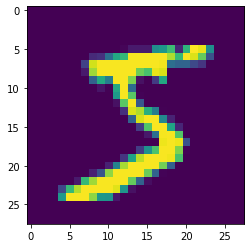

In [12]:
plt.imshow(train_data.train_data[0])

In [13]:
# Resize(size[, interpolation, max_size, …])

/Users/cristianespinosa/opt/anaconda3/envs/tensor/lib/python3.6/site-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


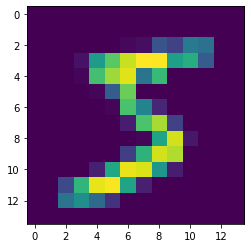

In [14]:
resized = transforms.Resize(size=14)(train_data.train_data)
plt.imshow(resized[0])

In [15]:
type(resized)

torch.Tensor

In [16]:
resized_28 = transforms.Resize(size=28)(train_data.train_data)
resized_14 = transforms.Resize(size=14)(train_data.train_data)
resized_7 = transforms.Resize(size=7)(train_data.train_data)
resized_4 = transforms.Resize(size=4)(train_data.train_data)

/Users/cristianespinosa/opt/anaconda3/envs/tensor/lib/python3.6/site-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


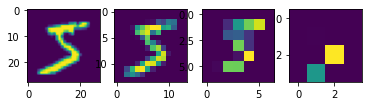

In [17]:
f, axarr = plt.subplots(1,4)
axarr[0].imshow(resized_28[0])
axarr[1].imshow(resized_14[0])
axarr[2].imshow(resized_7[0])
axarr[3].imshow(resized_4[0])

<h1>Using Pytorch's Data loaders to feed data into CNN</h1>

In [18]:
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7fe9dec33748>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7fea01ffb668>}

<h1>Defining the CNN</h1>

In [34]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        '''
        Goes through two layers of 2D convolutions, each followed by a 2x2 max pooling
        
        Dimensions:
        1.) Input Shape:          [batch_size, 1, 14, 14]
        
        2.) After conv:           [batch_size, 4, 12, 12]
            After max pooling:    [batch_size, 4, 6, 6]
        
        3.) After conv:           [batch_size, 8, 4, 4]
            After max pooling:    [batch_size, 8, 2, 2]
            
        4.) After flattening:     [batch_size, 8 * 2 * 2]
        '''
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=4,            
                kernel_size=3,              
                stride=1,                   
                padding=0,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(4, 8, 3, 1, 0),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(8 * 2 * 2, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 16 * 8 * 8)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    # return x for visualization
    
    
    def compute_sizes(in_size, ker_size, padding, stride):
        pass

In [20]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [21]:
loss_func = nn.CrossEntropyLoss(); print(loss_func)   
optimizer = torch.optim.Adam(cnn.parameters(), lr= 1e-5); print(optimizer)

CrossEntropyLoss()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 1e-05
    weight_decay: 0
)


<h1>Training the CNN</h1>
<div>Error source may be that the dataset resized_28 doesn't have 'labels', just 'images' ---> (for i, (images, labels))</div>

In [36]:
num_epochs = 10
def train(num_epochs, cnn, loaders):
    correct = 0
    cnn.train()
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)[0]               
            loss = loss_func(output, b_y)
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()  
#             output = cnn(images)
#             correct += (output == labels).float().sum()
#             accuracy = 100 * correct / len(trainset)
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
            pass
        
        pass
    
    
    pass
    
train(num_epochs, cnn, loaders)

RuntimeError: The size of tensor a (10) must match the size of tensor b (100) at non-singleton dimension 1

In [ ]:
f, axarr = plt.subplots(1,4)


In [23]:
cnn.train()
len(loaders['train'])

600

In [24]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [25]:
type(resized_28)

torch.Tensor

In [27]:
# for i, image in enumerate(loaders['train']):
#     print(i, image.shape)

<h1>Attempting to resize the dataset when importing with datasets.MNIST</h1>

In [28]:
# train_data = datasets.MNIST(
#     root = 'data',
#     train = True,                         
#     transform = transforms.Compose([
#                     transforms.ToTensor(),
#                     transforms.Resize(size=14)(train_data.data),
#                     transforms.Normalize(0, 1)
#                 ]), 
#     download = True,            
# )
# test_data = datasets.MNIST(
#     root = 'data', 
#     train = False, 
#     transform = transforms.Compose([
#                     transforms.ToTensor(),
#                     transforms.Resize(size=14)(test_data.data),
#                     transforms.Normalize(0, 1)
#                 ]) 
# )

In [29]:
train_data.data.shape

torch.Size([60000, 28, 28])